**Install NLTK**

In [1]:
!pip install nltk


To store dataset and save all works

In [3]:
from google.colab import drive


In [4]:
# Mount google drive
drive.mount('/content/drive')


Mounted at /content/drive


In [28]:
%cd "/content/drive/My Drive/Spam_Email_Classification"


/content/drive/My Drive/Spam_Email_Classification


In [29]:
!ls


'Email Spam.ipynb'


In [30]:
!git init

hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/drive/MyDrive/Spam_Email_Classification/.git/


In [32]:
!git remote add origin https://github.com/sewasewT7/Spam_Email_Classifier.git

In [33]:
!git add .

In [34]:
!git commit -m "Initial commit: Added Spam Email Classifier project"

Author identity unknown

*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'root@fd5a2b1dece2.(none)')


In [ ]:
!git config --global user.name "sewasewT7"
!git config --global user.email "sewasewtadele@gmail.com"


**Load Dataset using pandas**

In [5]:
import pandas as pd
file_path = '/content/drive/MyDrive/spam_ham_dataset.csv'
df = pd.read_csv(file_path)
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


**Preprocess Data**

In [6]:
#inspect dataset
print(f'Number of columns and rows: {df.shape}')

print(df.info())
print(df.describe())

Number of columns and rows: (5171, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB
None
        Unnamed: 0    label_num
count  5171.000000  5171.000000
mean   2585.000000     0.289886
std    1492.883452     0.453753
min       0.000000     0.000000
25%    1292.500000     0.000000
50%    2585.000000     0.000000
75%    3877.500000     1.000000
max    5170.000000     1.000000


In [16]:
# Check for misssing values
print(df.isnull().sum())
print(df.duplicated().sum())

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64
0


In [8]:
df.columns

Index(['Unnamed: 0', 'label', 'text', 'label_num'], dtype='object')

In [9]:
# Droping unneccessary columns
if 'unnamed: 0' in df.columns:
    df = df.drop(columns=['unnamed: 0'])

In [10]:
# Define Features and Target
X_text = df['text']
y = df['label_num']

**Exploratory Data Analysis (EDA)**

<ipython-input-12-0f7ca1ad7335>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df['label'], palette='pastel')


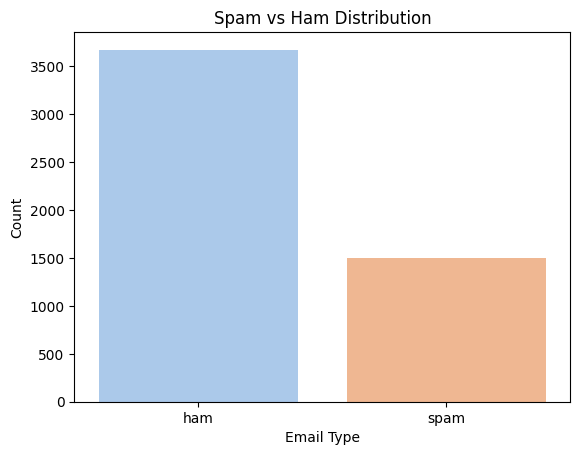

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x = df['label'], palette='pastel')
plt.title("Spam vs Ham Distribution")
plt.xlabel("Email Type")
plt.ylabel("Count")
plt.show()

**Word Cloud for Spam & Ham Emails**

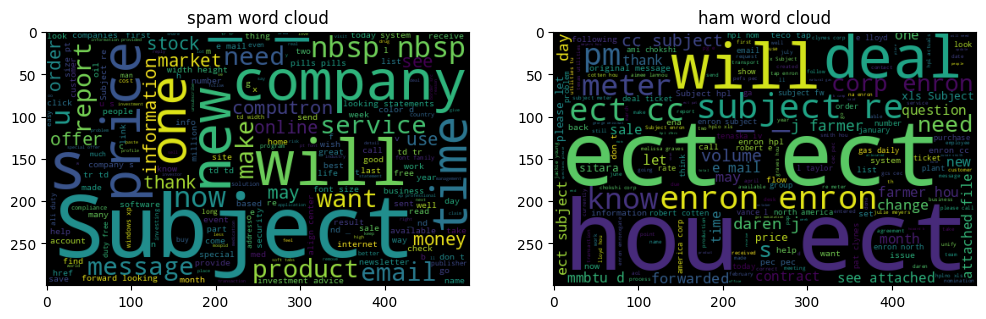

In [22]:
from wordcloud import WordCloud

spam_words = " ".join(df[df['label'] == 'spam']['text'])

ham_words = " ".join(df[df['label'] == 'ham']['text'])

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(WordCloud(width=500, height=300, background_color="black").generate(spam_words))
plt.title("spam word cloud")

plt.subplot(1,2,2)
plt.imshow(WordCloud(width=500, height=300, background_color="black").generate(ham_words))
plt.title("ham word cloud")

plt.show()


**Feature Engineering**

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(X_text)

**Train the Model using  Logistic Regression**

In [24]:
#Split the data into Traing and Testing sets

from sklearn.model_selection import train_test_split as train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

#predict on test set
y_pred = model.predict(X_test)

**Train the Model using Random Forest for Comparison**

In [25]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)

In [26]:
from sklearn.metrics import classification_report

print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred))

print("\nRandom Forest Performance:")
print(classification_report(y_test, rf_pred))

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       742
           1       0.97      0.99      0.98       293

    accuracy                           0.99      1035
   macro avg       0.98      0.99      0.99      1035
weighted avg       0.99      0.99      0.99      1035


Random Forest Performance:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       742
           1       0.95      0.98      0.97       293

    accuracy                           0.98      1035
   macro avg       0.97      0.98      0.98      1035
weighted avg       0.98      0.98      0.98      1035



**Save the result**

In [27]:
import pickle

# Save model
with open("spam_classifier.pkl", "wb") as f:
    pickle.dump(model, f)

# Save vectorizer
with open("vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)